In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [7]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)
t

array([  0.00000000e+00,   2.00000000e-02,   4.00000000e-02, ...,
         9.99600000e+01,   9.99800000e+01,   1.00000000e+02])

Challenge answer:If we use numpy.arange function, the code should be:

In [12]:
T = 100.0
dt = 0.02
t = numpy.arange(0.0, T+dt, dt)

In [13]:
t

array([  0.00000000e+00,   2.00000000e-02,   4.00000000e-02, ...,
         9.99600000e+01,   9.99800000e+01,   1.00000000e+02])

In [28]:
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81
N = int(T/dt)+1
u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [29]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

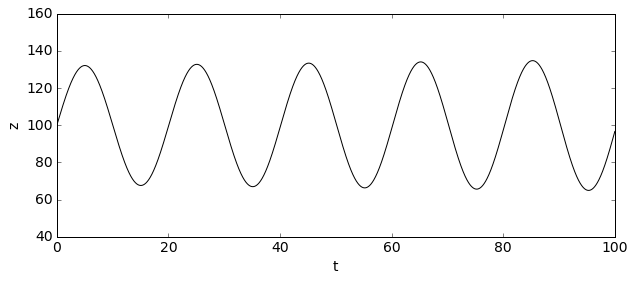

In [30]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis="both", labelsize=14)
pyplot.xlabel("t", fontsize=14)
pyplot.ylabel("z", fontsize=14)
pyplot.plot(t,z, "k-")

When v = 20

In [20]:
z0 = 100.
b0 = 20.
zt = 100.
g = 9.81
N = int(T/dt)+1
u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [21]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

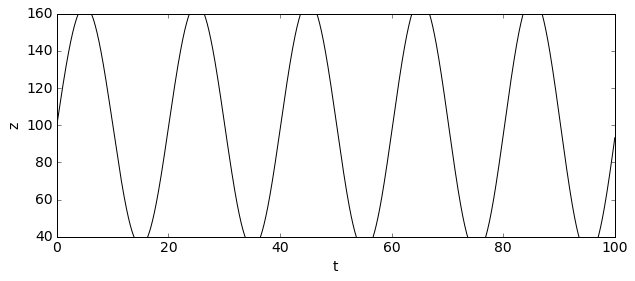

In [22]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis="both", labelsize=14)
pyplot.xlabel("t", fontsize=14)
pyplot.ylabel("z", fontsize=14)
pyplot.plot(t,z, "k-")

When v = 0

In [23]:
z0 = 100.
b0 = 0.
zt = 100.
g = 9.81
N = int(T/dt)+1
u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [24]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

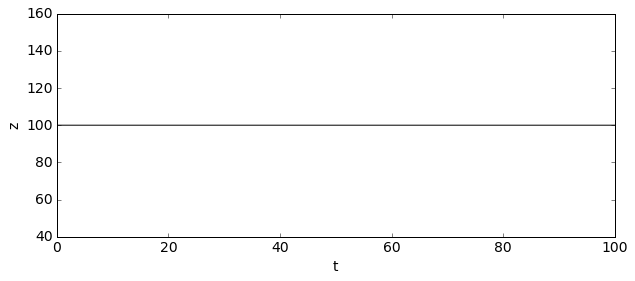

In [25]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis="both", labelsize=14)
pyplot.xlabel("t", fontsize=14)
pyplot.ylabel("z", fontsize=14)
pyplot.plot(t,z, "k-")

In [32]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt

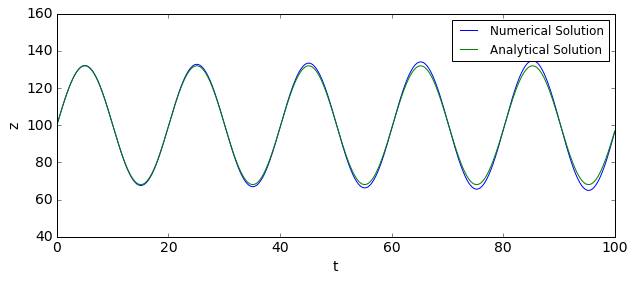

In [33]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis="both", labelsize=14)
pyplot.xlabel("t", fontsize=14)
pyplot.ylabel("z", fontsize=14)
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution'])

When dt = 0.1

In [35]:
T = 100.0
dt = 0.01
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

In [36]:
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81
N = int(T/dt)+1
u = numpy.array([z0, b0])

z = numpy.zeros(N)
z[0] = z0

In [37]:
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

In [38]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt

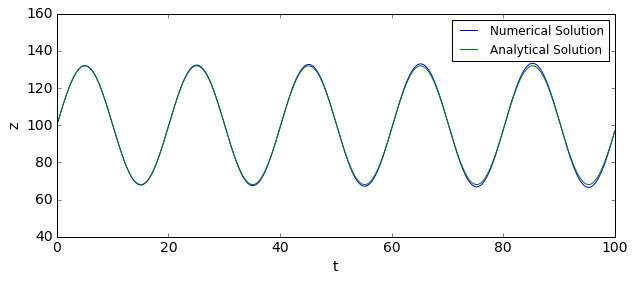

In [39]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40, 160)
pyplot.tick_params(axis="both", labelsize=14)
pyplot.xlabel("t", fontsize=14)
pyplot.ylabel("z", fontsize=14)
pyplot.plot(t,z)
pyplot.plot(t,z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution'])

In [42]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
    z_values[i] = z.copy()

In [45]:
def get_error(z, dt):
    """Return the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1}norm of the errorwith respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+(z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [46]:
error_values = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

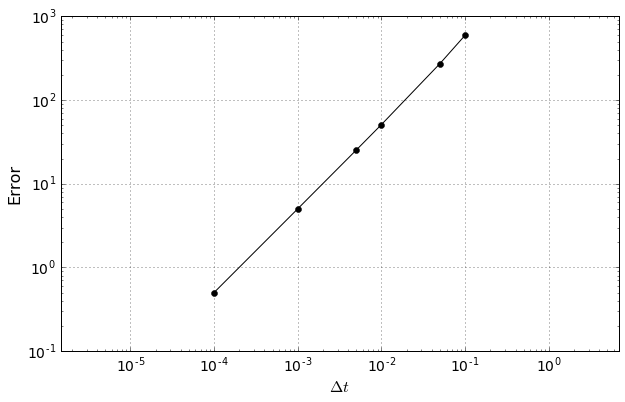

In [48]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis="both", labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.loglog(dt_values, error_values, 'ko-')
pyplot.axis('equal')








Challenge answer

In [50]:
def euler_method(T, dt, z0, b0, zt):
    """Return the numerical solution using L-2 norm.
    
    Parameters
    ----------
    T : Final time.
    dt : float
        time increment.
    z0 : Altitude
    b0 : Upward velocity resulting from gust
    zt : Depth below a reference line when the aircraft is flying with the trim velocity    
    Returns
    -------
        L_{2}norm of the error with respect to the exact solution.
    """
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T, N)
    u = numpy.array([z0, b0])
    g = 9.81
    z_euler = numpy.empty_like(t)
    z_euler[0] = z0
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z_euler[n] = u[0]
    
    return z_euler

In [52]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
T = 100.
z0 = 100.
b0 = 10.
zt = 100.
for i, dt in enumerate(dt_values):
     z_values[i] = euler_method(T, dt, z0, b0, zt)

In [53]:
error_values = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

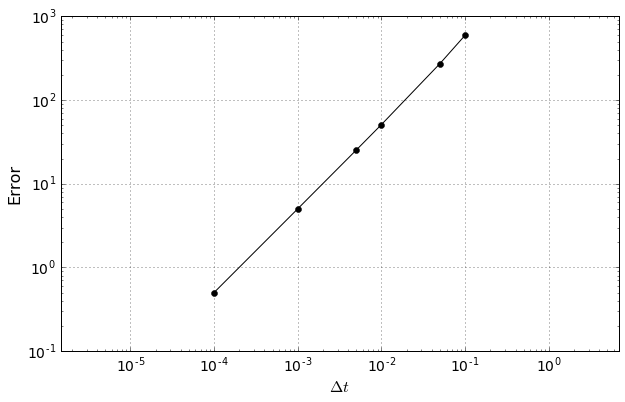

In [54]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis="both", labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.loglog(dt_values, error_values, 'ko-')
pyplot.axis('equal')